In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import subprocess

import libs.gen_selection as gs
import libs.graphical_interface as gui
import libs.utility as ut
import libs.machine_learning as ml
import libs.taylor as tr

In [3]:
#stratData = ut.readData("strat_data", "static_pred")
stratData = ut.readData("strat_data", "dynamic_pred")
display(stratData)

,Aj,Bj,Aa,Ba
0,-86.578340,37.492741,-49.337102,18.032950
1,-84.356677,28.402022,-47.323965,9.245189
2,-68.680094,-26.467341,-63.166301,38.666377
3,-51.816150,-40.250791,-69.296155,-37.647572
4,-101.934827,26.035904,-48.801369,-39.777466
...,...,...,...,...
95,-80.509245,52.792832,-61.216507,49.770003
96,-73.144517,-29.256973,-74.352571,3.868980
97,-17.672331,-16.054416,-62.191732,-12.702416
98,-65.745168,-27.598721,-79.112739,-50.851873


In [4]:
mpData = ut.readData("mp_data", "static_pred")
#mpData = ut.readData("mp_data", "dynamic_pred")
with pd.option_context('display.precision', 4, 'display.max_columns', 10):
    display(mpData)

,M1,M2,M3,M4,M5,...,M6M7,M6M8,M7M7,M7M8,M8M8
0,151.0256,-134.8379,-1591.4188,-2332.3709,92.0063,...,7.5753e+05,22170.1309,6.9035e+07,2.0204e+06,5.9130e+04
1,105.6200,-52.6143,-78831.2493,-2235.3005,135.6683,...,4.2358e+06,297701.5464,9.1811e+08,6.4526e+07,4.5350e+06
2,126.4695,-126.2192,-17405.3108,-1361.1169,106.6154,...,2.5481e+05,28359.3249,9.2142e+06,1.0255e+06,1.1413e+05
3,39.0901,-23.8941,-5065.6241,-1157.3431,66.0790,...,8.7250e+05,33824.9913,1.4869e+08,5.7645e+06,2.2348e+05
4,84.0743,-70.7485,-94.8417,-2.4052,68.5669,...,1.2212e+06,34902.7929,1.3986e+09,3.9972e+07,1.1424e+06
...,...,...,...,...,...,...,...,...,...,...,...
495,53.0553,-36.0102,-4912.8480,-613.0030,104.7642,...,4.6776e+06,144183.1486,1.6033e+09,4.9419e+07,1.5233e+06
496,108.6075,-56.5536,-73203.2663,-2163.2050,117.2394,...,7.3437e+06,260599.1615,3.0808e+09,1.0932e+08,3.8795e+06
497,68.1493,-60.5881,-259.2396,-134.7519,99.5645,...,5.9203e+04,12478.5722,4.4421e+05,9.3629e+04,1.9735e+04
498,26.4124,-21.0468,-139.0276,-1695.5283,79.9564,...,8.3611e+03,795.8367,1.4263e+04,1.3576e+03,1.2922e+02


In [3]:
stratFitData = ut.readData("strat_fit_data", "static_pred")
display(stratFitData)

,Aj,Bj,Aa,Ba,fit
0,-32.124539,8.978988,-74.281205,20.516454,0.122140
1,-64.557149,-63.195235,-43.094090,39.179464,-0.095977
2,-49.664621,29.694500,-63.846178,-12.400792,0.602292
3,-112.078487,-16.019598,-92.800682,24.854612,-0.041407
4,-79.946916,-2.191970,-91.023665,-43.527015,0.840645
...,...,...,...,...,...
495,-102.103374,-15.776178,-65.168434,45.038782,-0.161595
496,-62.423181,-60.897626,-56.257593,53.027332,-0.262881
497,-91.321894,3.623980,-68.882506,5.810745,0.301743
498,-121.134009,-2.653907,-82.888311,2.459736,-0.001913


In [5]:
selData = ut.readData("sel_data", "static_pred")
#selData = ut.readData("sel_data", "dynamic_pred")
with pd.option_context('display.precision', 4, 'display.max_columns', 10):
    display(selData)

,class,M1,M2,M3,M4,...,M6M7,M6M8,M7M7,M7M8,M8M8
0,1,45.4057,-82.2237,77239.8305,-97.0703,...,-3.4783e+06,-275531.4154,-8.4907e+08,-6.2506e+07,-4.4759e+06
1,-1,-45.4057,82.2237,-77239.8305,97.0703,...,3.4783e+06,275531.4154,8.4907e+08,6.2506e+07,4.4759e+06
2,-1,24.5561,-8.6188,15813.8920,-971.2540,...,5.0272e+05,-6189.1940,5.9821e+07,9.9491e+05,-5.5003e+04
3,1,-24.5561,8.6188,-15813.8920,971.2540,...,-5.0272e+05,6189.1940,-5.9821e+07,-9.9491e+05,5.5003e+04
4,1,111.9355,-110.9439,3474.2053,-1175.0277,...,-1.1497e+05,-11654.8604,-7.9657e+07,-3.7441e+06,-1.6435e+05
...,...,...,...,...,...,...,...,...,...,...,...
249495,-1,-41.7370,39.5413,120.2120,-1560.7764,...,-5.0841e+04,-11682.7355,-4.2995e+05,-9.2272e+04,-1.9606e+04
249496,-1,-79.4387,63.9419,-45.5804,1933.6365,...,-1.8870e+06,-37228.5731,-2.7554e+09,-7.0290e+07,-1.7779e+06
249497,1,79.4387,-63.9419,45.5804,-1933.6365,...,1.8870e+06,37228.5731,2.7554e+09,7.0290e+07,1.7779e+06
249498,-1,-121.1756,103.4832,74.6316,372.8601,...,-1.9379e+06,-48911.3087,-2.7558e+09,-7.0383e+07,-1.7975e+06


In [8]:
#compareCoefData = ut.readData("compare_coef_data", "static_pred")
compareCoefData = ut.readData("compare_coef_data", "dynamic_pred")
#display(compareCoefData[['machine', 'nearPnt', 'optPnt']])
display(compareCoefData[['machine']])

,machine
lam1,1.000000e+00
lam2,1.153898e+00
lam3,2.199009e-03
lam4,3.379638e-02
lam5,1.873764e+00
lam6,5.528861e+00
lam7,5.319998e-04
lam8,3.894318e-02
lam11,3.422594e-03
lam12,-2.744787e-03


In [10]:
stratPopData = ut.readData("strat_pop_data", "dynamic_pred").sort_values(by=['t'], ascending=False)
display(stratPopData[['Aj', 'Bj', 'Aa', 'Ba', 't']])

,Aj,Bj,Aa,Ba,t
99,-34.580000,-3.290000,-83.320000,-51.570000,5000.000000
84,-56.278235,-9.001956,-79.035845,-57.606978,537.105371
14,-28.532572,19.809711,-77.734577,-53.898837,522.355224
78,-44.794071,19.119975,-85.888024,-43.776393,506.305063
15,-30.568359,13.021526,-88.037199,-37.156769,492.804928
...,...,...,...,...,...
87,-107.999811,1.217076,-66.186475,63.206710,43.200432
86,-55.560500,-46.102990,-66.388019,48.856746,42.950430
89,-49.455138,45.621872,-53.504832,50.590479,42.600426
92,-74.969110,39.227673,-73.558576,52.191099,42.400424


In [3]:
comparePqrsData = ut.readData("compare_pqrs_data", "dynamic_pred")
display(comparePqrsData)

,p,q,r,s
true,1.565672,0.33125,2.555424,3.944674
restored,1.544959,0.39217,2.555291,3.873234


In [9]:
compareParamData = ut.readData("compare_param_data", "dynamic_pred")
display(compareParamData.loc[['restored']])

,a_j,b_j,g_j,d_j,a_a,b_a,g_a,d_a
restored,0.013559,0.000004,0.003149,0.000142,0.069855,0.000007,0.104473,0.000533


In [5]:
tmpData = pd.DataFrame({'Aj': [-34.58, -32.0], 'Bj': [-3.29, -8.0], 'Aa': [-83.32, -86.0], 'Ba': [-51.57, -54.0]}, index=['true', 'restored'])
display(tmpData)

,Aj,Bj,Aa,Ba
true,-34.58,-3.29,-83.32,-51.57
restored,-32.00,-8.00,-86.00,-54.00


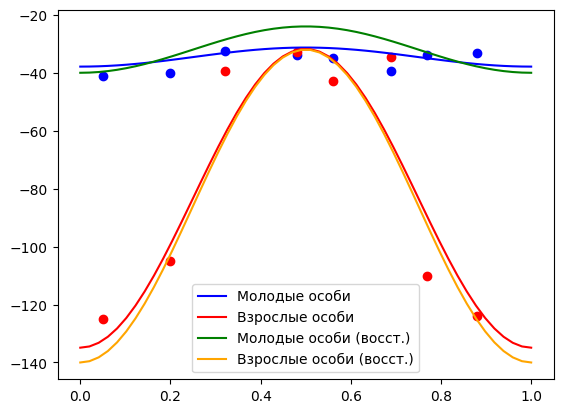

In [5]:
ax = gui.pointsCalanus_2()
gui.compareStratSins(-34.58, -3.29, -83.32, -51.57, -32.0, -8.0, -86.0, -54.0, ax)
plt.show()

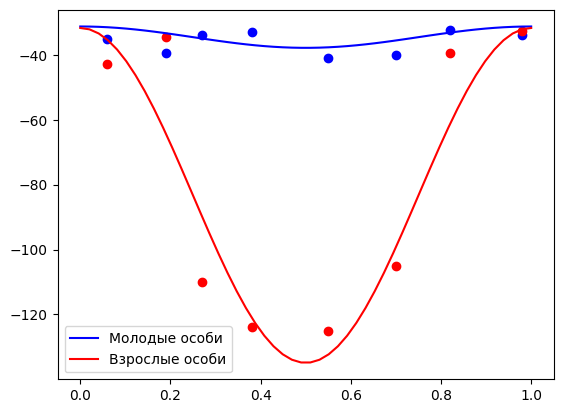

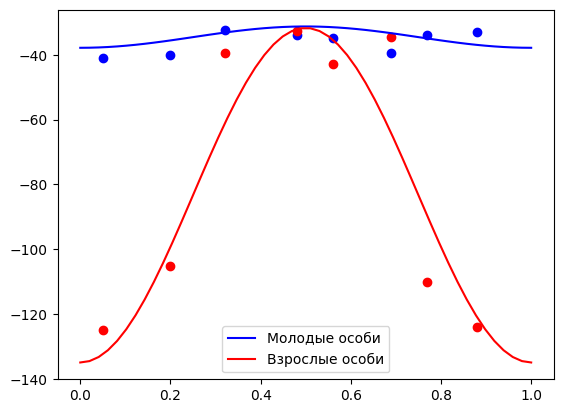

In [3]:
ax = gui.pointsCalanus_1()
gui.stratSins(-34.58, 3.29, -83.32, 51.57, ax)
ax = gui.pointsCalanus_2()
gui.stratSins(-34.58, -3.29, -83.32, -51.57, ax)
plt.show()